In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [7]:
data = pd.read_csv('ilo_usd_male_female_2011_2021.csv')
data.head()

,Unnamed: 0,country,sex,occupation,year,monthly_earnings_usd,group
0,0,Afghanistan,Male,Total,2014,159.57,T
1,1,Afghanistan,Male,1. Managers,2014,305.60,1
2,2,Afghanistan,Male,2. Professionals,2014,197.08,2
3,3,Afghanistan,Male,3. Technicians and associate professionals,2014,229.72,3
4,4,Afghanistan,Male,4. Clerical support workers,2014,271.34,4


In [11]:
data.shape

(14945, 7)

In [12]:
data = data.drop(['Unnamed: 0', 'group'], axis=1)
data.head()

,country,sex,occupation,year,monthly_earnings_usd
0,Afghanistan,Male,Total,2014,159.57
1,Afghanistan,Male,1. Managers,2014,305.60
2,Afghanistan,Male,2. Professionals,2014,197.08
3,Afghanistan,Male,3. Technicians and associate professionals,2014,229.72
4,Afghanistan,Male,4. Clerical support workers,2014,271.34


In [13]:
data.shape

(14945, 5)

In [15]:
data.groupby('year')['country'].nunique()

year
2011    53
2012    63
2013    64
2014    71
2015    72
2016    75
2017    79
2018    80
2019    83
2020    67
2021    23
Name: country, dtype: int64

In [16]:
# get data from 2019, which is the last full year that wasn't affected by COVID too badly 
# caveat: COVID did start sometime in Q4 of 2019, but severe lockdowns hadn't started yet 

data_2019 = data[data['year']==2019]
data_2019.head()

,country,sex,occupation,year,monthly_earnings_usd
159,Albania,Male,Total,2019,500.13
160,Albania,Male,1. Managers,2019,882.42
161,Albania,Male,2. Professionals,2019,742.16
162,Albania,Male,3. Technicians and associate professionals,2019,588.29
163,Albania,Male,4. Clerical support workers,2019,525.30


In [17]:
data_2019.shape

(1704, 5)

In [18]:
data_2019['country'].nunique()

83

In [19]:
data_2019_pivot = data_2019.pivot(index=['country','occupation'], 
                                  columns=['sex'], 
                                  values='monthly_earnings_usd').reset_index()
data_2019_pivot.head()

sex,country,occupation,Female,Male
0,Albania,0. Armed forces occupations,555.45,572.86
1,Albania,1. Managers,895.38,882.42
2,Albania,2. Professionals,588.09,742.16
3,Albania,3. Technicians and associate professionals,487.87,588.29
4,Albania,4. Clerical support workers,498.06,525.30


In [26]:
# gut check: df shape 
data_2019_pivot.shape

(876, 5)

In [27]:
# gut check: are there any NaNs? 
data_2019_pivot.isna().sum()

sex
country          0
occupation       0
Female          47
Male             1
income_ratio    49
dtype: int64

In [29]:
# closer look at some of the rows with NAs 
data_2019_nans = data_2019_pivot[data_2019_pivot.isna().any(axis=1)]
data_2019_nans.head()

sex,country,occupation,Female,Male,income_ratio
11,Albania,X. Not elsewhere classified,0.0,0.00,NaN
33,Austria,0. Armed forces occupations,NaN,5034.28,NaN
45,Belgium,0. Armed forces occupations,NaN,6199.42,NaN
51,Belgium,"6. Skilled agricultural, forestry and fishery ...",NaN,4164.83,NaN
56,Belize,0. Armed forces occupations,NaN,769.37,NaN


In [30]:
data_2019_nans['occupation'].unique()

array(['X. Not elsewhere classified', '0. Armed forces occupations',
       '6. Skilled agricultural, forestry and fishery workers',
       '8. Plant and machine operators, and assemblers', '1. Managers'],
      dtype=object)

In [31]:
data_2019_nans.shape

(49, 5)

In [32]:
data_2019_nans['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Belize', 'Bhutan', 'Bolivia',
       'Bulgaria', 'Costa Rica', 'Cyprus', "Côte d'Ivoire", 'Denmark',
       'Dominican Republic', 'El Salvador', 'Estonia', 'Guatemala',
       'Guinea', 'Honduras', 'Hungary', 'Ireland', 'Jordan', 'Lesotho',
       'Lithuania', 'Luxembourg', 'Maldives', 'Marshall Islands',
       'Myanmar', 'Netherlands', 'Pakistan', 'Panama', 'Paraguay',
       'Poland', 'Senegal', 'Spain', 'Switzerland', 'Viet Nam', 'Zambia'],
      dtype=object)

In [33]:
swi = data_2019_nans[data_2019_nans['country']=='Switzerland']
swi

sex,country,occupation,Female,Male,income_ratio
790,Switzerland,0. Armed forces occupations,NaN,9381.02,NaN


In [35]:
nans_occs = data_2019_nans.groupby('occupation')['country'].count().reset_index()
nans_occs

,occupation,country
0,0. Armed forces occupations,23
1,1. Managers,2
2,"6. Skilled agricultural, forestry and fishery ...",10
3,"8. Plant and machine operators, and assemblers",5
4,X. Not elsewhere classified,9


In [36]:
# which 2 countries have NaN in the "Managers" group? 
nans_1 = data_2019_nans[data_2019_nans['occupation']=='1. Managers']
nans_1

sex,country,occupation,Female,Male,income_ratio
317,Guinea,1. Managers,NaN,283.50,NaN
691,Senegal,1. Managers,NaN,502.43,NaN


In [22]:
data_2019_pivot['income_ratio'] = data_2019_pivot['Female'] / data_2019_pivot['Male']
data_2019_pivot.head()

sex,country,occupation,Female,Male,income_ratio
0,Albania,0. Armed forces occupations,555.45,572.86,0.969609
1,Albania,1. Managers,895.38,882.42,1.014687
2,Albania,2. Professionals,588.09,742.16,0.792403
3,Albania,3. Technicians and associate professionals,487.87,588.29,0.829302
4,Albania,4. Clerical support workers,498.06,525.30,0.948144


In [21]:
data_2019_pivot['income_ratio'].describe()

count    827.000000
mean       0.811224
std        0.182435
min        0.224009
25%        0.713030
50%        0.803474
75%        0.880327
max        2.875000
Name: income_ratio, dtype: float64

In [37]:
# ok let's focus on data in 2019 that don't have NaNs 

data19 = data_2019_pivot.dropna()
data19.head()

sex,country,occupation,Female,Male,income_ratio
0,Albania,0. Armed forces occupations,555.45,572.86,0.969609
1,Albania,1. Managers,895.38,882.42,1.014687
2,Albania,2. Professionals,588.09,742.16,0.792403
3,Albania,3. Technicians and associate professionals,487.87,588.29,0.829302
4,Albania,4. Clerical support workers,498.06,525.30,0.948144


In [38]:
data19.shape

(827, 5)

In [39]:
# drop unnecessary columns 
data19 = data19.loc[:,['country','occupation','income_ratio']]
data19.head()

sex,country,occupation,income_ratio
0,Albania,0. Armed forces occupations,0.969609
1,Albania,1. Managers,1.014687
2,Albania,2. Professionals,0.792403
3,Albania,3. Technicians and associate professionals,0.829302
4,Albania,4. Clerical support workers,0.948144


In [40]:
data19['country'].nunique()

83

In [41]:
# export so I don't have to remake this df again in the future 
data19.to_csv('ilo_usd_ratio_2019.csv')

In [51]:
data19 = data19.replace('X. Not elsewhere classified', '10. Not elsewhere classified')
data19.head()

sex,country,occupation,income_ratio
0,Albania,0. Armed forces occupations,0.969609
1,Albania,1. Managers,1.014687
2,Albania,2. Professionals,0.792403
3,Albania,3. Technicians and associate professionals,0.829302
4,Albania,4. Clerical support workers,0.948144


In [52]:
data19['occupation'].unique()

array(['0. Armed forces occupations', '1. Managers', '2. Professionals',
       '3. Technicians and associate professionals',
       '4. Clerical support workers', '5. Service and sales workers',
       '6. Skilled agricultural, forestry and fishery workers',
       '7. Craft and related trades workers',
       '8. Plant and machine operators, and assemblers',
       '9. Elementary occupations', 'Total',
       '10. Not elsewhere classified'], dtype=object)

In [54]:
data19 = data19.sort_values(['country', 'occupation'])
data19.head(20)

sex,country,occupation,income_ratio
0,Albania,0. Armed forces occupations,0.969609
1,Albania,1. Managers,1.014687
2,Albania,2. Professionals,0.792403
3,Albania,3. Technicians and associate professionals,0.829302
4,Albania,4. Clerical support workers,0.948144
5,Albania,5. Service and sales workers,0.768311
6,Albania,"6. Skilled agricultural, forestry and fishery ...",0.930302
7,Albania,7. Craft and related trades workers,0.758365
8,Albania,"8. Plant and machine operators, and assemblers",0.758222
9,Albania,9. Elementary occupations,0.924843


In [ ]:
aliases = {'0. Armed forces occupations':'0 Armed forces', 
           '1. Managers':'1. Managerial', 
           '3. Technicians and associate professionals':'3. Technicians and associates', 
           '4. Clerical support workers':'4. Clerical support', 
           ''}

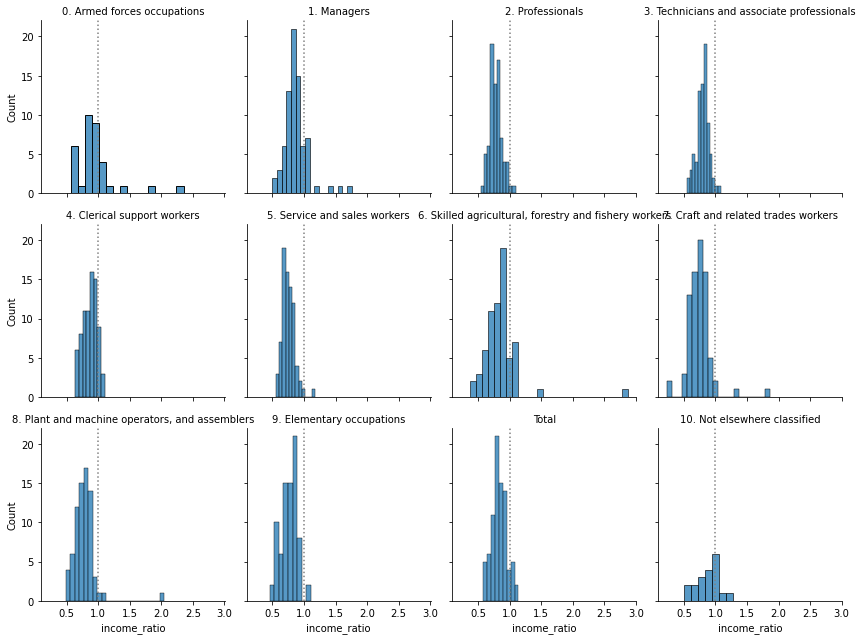

In [53]:
g = sns.FacetGrid(data=data19, col='occupation', col_wrap=4, margin_titles=True)
g.map(sns.histplot, 'income_ratio')
g.refline(x=1, color='gray', ls=':')
g.set_titles(col_template="{col_name}")